## Water Column Oil Presence Notebook

Fourth figure request for Stephanie


In [1]:
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as mcm
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import xarray as xr

%matplotlib inline

In [2]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [3]:
#mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
mesh = xr.open_dataset('/home/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [4]:
#data3d = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first240_oilpresence.nc')
data3d = xr.open_dataset('~/Documents/MIDOSS/MIDOSS_aggregated_merged.nc')

In [5]:
jmin, jmax = data3d.x.values[0]+1, data3d.x.values[-1]+2
imin, imax = data3d.y.values[0]+1, data3d.y.values[-1]+2

In [6]:
raw = data3d.OilWaterColumnOilVol_below_presence

WaterColumnOilVol_below_presence.values is the maximum value in time at any depth below the surface at a given i, j for a given run.

In [7]:
oil_array = (raw > 0.001).astype(int).mean(axis=0)
print (oil_array.max())
oil = np.ma.masked_array(oil_array, oil_array < 0.01)  #mask anything less than 1%
print (oil.mask.min())

<xarray.DataArray 'OilWaterColumnOilVol_below_presence' ()>
array(0.14246196)
False


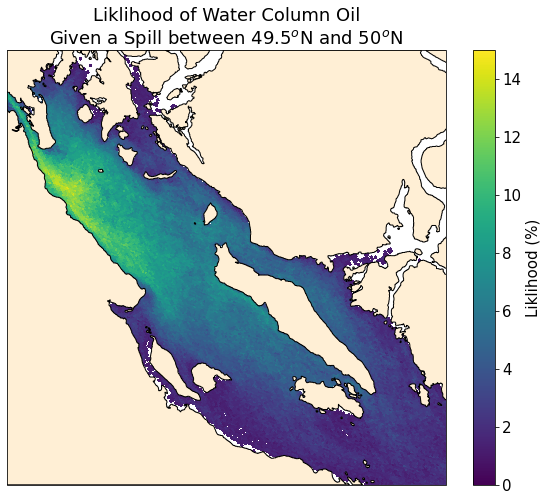

In [36]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.pcolormesh(
    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], oil*100, vmax=15, vmin=0,
    transform=crs.PlateCarree(), zorder=0,
)
cb = fig.colorbar(C, ax=ax);
cb.set_label('Liklihood (%)')
ax.set_title("Liklihood of Water Column Oil\nGiven a Spill between 49.5$^o$N and 50$^o$N");
fig.savefig('ProbWaterColumn_2D_pcolor.png')

In [16]:
smooth_oil = oil*0.
s = 2
for ii in range(s, oil.shape[0]-s):
    for jj in range(s, oil.shape[1]-s):
        smooth_oil[ii, jj] = oil[ii-s:ii+s+1, jj-s:jj+s+1].mean()

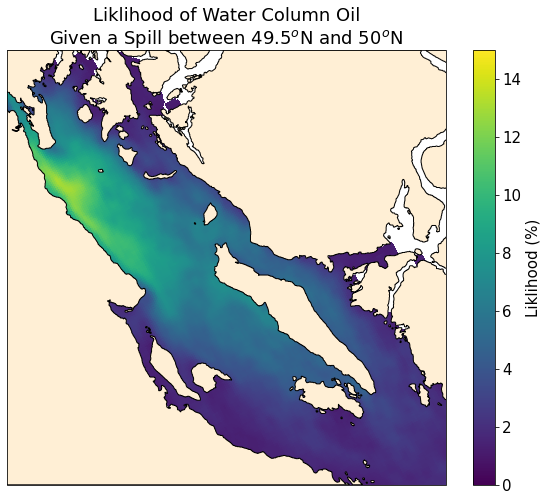

In [17]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.pcolormesh(
    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], smooth_oil*100, vmax=15, vmin=0,
    transform=crs.PlateCarree(), zorder=0,
)
cb = fig.colorbar(C, ax=ax);
cb.set_label('Liklihood (%)')
ax.set_title("Liklihood of Water Column Oil\nGiven a Spill between 49.5$^o$N and 50$^o$N");
#fig.savefig('ProbWaterColumn_2D_pcolor.png')

In [26]:
smooth_raw = raw*0.
s = 2
for kk in range(raw.shape[0]):
    for ii in range(s, raw.shape[1]-s):
        for jj in range(s, raw.shape[2]-s):
            smooth_raw[kk, ii, jj] = raw[kk, ii-s:ii+s+1, jj-s:jj+s+1].sum()

KeyboardInterrupt: 

In [28]:
s = 1.5
for kk in range(raw.shape[0]):
#    if int(kk/10)*10 == kk:
#        print (kk)
    smooth_raw[kk] = gaussian_filter(raw[kk], s)

In [32]:
smooth_array = (smooth_raw > 0.001).astype(int).mean(axis=0)
smooth = np.ma.masked_array(smooth_array, smooth_array < 0.01)  #mask anything less than 1%
print (smooth.mask.min())

False


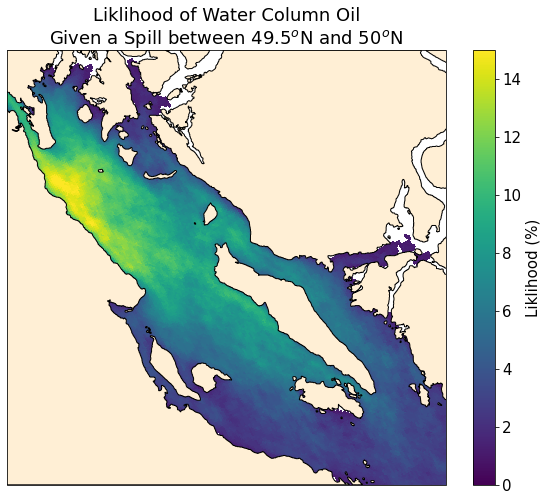

In [35]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.pcolormesh(
    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], smooth*100, vmax=15, vmin=0,
    transform=crs.PlateCarree(), zorder=0,
)
cb = fig.colorbar(C, ax=ax);
cb.set_label('Liklihood (%)')
ax.set_title("Liklihood of Water Column Oil\nGiven a Spill between 49.5$^o$N and 50$^o$N");
#fig.savefig('ProbWaterColumn_2D_pcolor.png')